# EXOPLANET hunting in deep space
done by: Pranaydeep Mayank    reg.no.:19BAI1026




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import ndimage
from sklearn import  metrics
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from scipy.signal import savgol_filter
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
train=pd.read_csv("exoTrain.csv")
test=pd.read_csv("exoTest.csv")

In [30]:
train

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0      -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1      -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2      486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3      311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4    -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   
...       ...     ...  ...        ...        ...        ...        ...   
5082   -49.25  -30.92  ...     139.95     147.26     156.95     155.64   
5083   458.87  492.84  ...     -26.50      -4.84     -76.30     -37.84   
5084   254.88  237.60  ...     -26.82     -53.89     -48.71      30.99   
5085    -0.03    3.28  ...      10.86      -3.23      -5.10      -4.61   
5086   178.93  118.93  ...      71.19       0.97      55.20      -1.63   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0         48.57      92.54      39.32      61.42       5.08     -39.54  
1         -4.86       0.76     -11.70       6.46      16.00      19.93  
2        -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3         20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4       -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  
...         ...        ...        ...        ...        ...        ...  
5082     156.36     151.75     -24.45     -17.00       3.23      19.28  
5083    -153.83    -136.16      38.03     100.28     -45.64      35.58  
5084      15.96      -3.47      65.73      88.42      79.07      79.43  
5085      -9.82      -1.50      -4.65     -14.55      -6.41      -2.55  
5086      -5.50     -25.33     -41.31     -16.72     -14.09      27.82  

[5087 rows x 3198 columns]

In [4]:
test

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
..     ...      ...      ...      ...      ...      ...      ...      ...   
565      1   374.46   326.06   319.87   338.23   251.54   209.84   186.35   
566      1    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10   
567      1   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   
568      1    91.36    85.60    48.81    48.69    70.05    22.30    11.63   
569      1  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09   

      FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0       6.98     6.63  ...      14.52      19.29      14.44      -1.62   
1    5569.47  5550.44  ...    -581.91    -984.09   -1230.89   -1600.45   
2     362.95   207.27  ...      17.82     -51.66     -48.29     -59.99   
3    -746.50  -709.53  ...     122.34      93.03      93.03      68.81   
4     -45.20    -5.04  ...     -37.87     -61.85     -27.15     -21.18   
..       ...      ...  ...        ...        ...        ...        ...   
565   167.46   135.45  ...    -123.55    -166.90    -222.44    -209.71   
566    -4.54   -11.55  ...     -12.40      -5.99     -17.94     -11.96   
567   -24.71   -13.12  ...      -0.73      -1.64       1.58      -4.82   
568    37.86    28.27  ...       2.44      11.53     -16.42     -17.86   
569  1142.09   902.31  ...     695.41     865.97     882.41    1203.06   

     FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0        13.33      45.50      31.93      35.78     269.43      57.72  
1     -1824.53   -2061.17   -2265.98   -2366.19   -2294.86   -2034.72  
2       -82.10    -174.54     -95.23    -162.68     -36.79      30.63  
3         9.81      20.75      20.25    -120.81    -257.56    -215.41  
4       -33.76     -85.34     -81.46     -61.98     -69.34     -17.84  
..         ...        ...        ...        ...        ...        ...  
565    -180.16    -166.83    -235.66    -213.63    -205.99    -194.07  
566     -12.11     -13.68      -3.59      -5.32     -10.98     -11.24  
567     -11.93     -17.14      -4.25       5.47      14.46      18.70  
568      21.10     -10.25     -37.06      -8.43      -6.48      17.60  
569    1293.03    1354.41    -192.81    -277.22     -69.63     121.56  

[570 rows x 3198 columns]

LABEL 1:it is an exoplanet.
 
 LABEL 2:it is not an exoplanet.


Trainset:

5087 rows or observations.
3198 columns or features.
Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.


Testset:

570 rows or observations.
3198 columns or features.
Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
5 confirmed exoplanet-stars and 565 non-exoplanet-stars.

# DATA DESCRIPTION

In [5]:
df=pd.DataFrame(train)
df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [6]:
df=pd.DataFrame(test)
df['LABEL'].value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [9]:
train.describe()

LABEL        FLUX.1        FLUX.2        FLUX.3        FLUX.4  \
count  5087.000000  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean      1.007273  1.445054e+02  1.285778e+02  1.471348e+02  1.561512e+02   
std       0.084982  2.150669e+04  2.179717e+04  2.191309e+04  2.223366e+04   
min       1.000000 -2.278563e+05 -3.154408e+05 -2.840018e+05 -2.340069e+05   
25%       1.000000 -4.234000e+01 -3.952000e+01 -3.850500e+01 -3.505000e+01   
50%       1.000000 -7.100000e-01 -8.900000e-01 -7.400000e-01 -4.000000e-01   
75%       1.000000  4.825500e+01  4.428500e+01  4.232500e+01  3.976500e+01   
max       2.000000  1.439240e+06  1.453319e+06  1.468429e+06  1.495750e+06   

             FLUX.5        FLUX.6        FLUX.7        FLUX.8        FLUX.9  \
count  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   1.561477e+02  1.469646e+02  1.168380e+02  1.144983e+02  1.228639e+02   
std    2.308448e+04  2.410567e+04  2.414109e+04  2.290691e+04  2.102681e+04   
min   -4.231956e+05 -5.975521e+05 -6.724046e+05 -5.790136e+05 -3.973882e+05   
25%   -3.195500e+01 -3.338000e+01 -2.813000e+01 -2.784000e+01 -2.683500e+01   
50%   -6.100000e-01 -1.030000e+00 -8.700000e-01 -6.600000e-01 -5.600000e-01   
75%    3.975000e+01  3.514000e+01  3.406000e+01  3.170000e+01  3.045500e+01   
max    1.510937e+06  1.508152e+06  1.465743e+06  1.416827e+06  1.342888e+06   

       ...     FLUX.3188     FLUX.3189     FLUX.3190     FLUX.3191  \
count  ...  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   ...  3.485578e+02  4.956476e+02  6.711211e+02  7.468790e+02   
std    ...  2.864786e+04  3.551876e+04  4.349963e+04  4.981375e+04   
min    ... -3.240480e+05 -3.045540e+05 -2.933140e+05 -2.838420e+05   
25%    ... -1.760000e+01 -1.948500e+01 -1.757000e+01 -2.076000e+01   
50%    ...  2.600000e+00  2.680000e+00  3.050000e+00  3.590000e+00   
75%    ...  2.211000e+01  2.235000e+01  2.639500e+01  2.909000e+01   
max    ...  1.779338e+06  2.379227e+06  2.992070e+06  3.434973e+06   

          FLUX.3192     FLUX.3193      FLUX.3194      FLUX.3195  \
count  5.087000e+03  5.087000e+03    5087.000000    5087.000000   
mean   6.937372e+02  6.553031e+02    -494.784966    -544.594264   
std    5.087103e+04  5.339979e+04   17844.469520   17722.339334   
min   -3.288214e+05 -5.028894e+05 -775322.000000 -732006.000000   
25%   -2.226000e+01 -2.440500e+01     -26.760000     -24.065000   
50%    3.230000e+00  3.500000e+00      -0.680000       0.360000   
75%    2.780000e+01  3.085500e+01      18.175000      18.770000   
max    3.481220e+06  3.616292e+06  288607.500000  215972.000000   

           FLUX.3196      FLUX.3197  
count    5087.000000    5087.000000  
mean     -440.239100    -300.536399  
std     16273.406292   14459.795577  
min   -700992.000000 -643170.000000  
25%       -21.135000     -19.820000  
50%         0.900000       1.430000  
75%        19.465000      20.280000  
max    207590.000000  211302.000000  

[8 rows x 3198 columns]

Checking for null values:

<AxesSubplot:xlabel='index'>

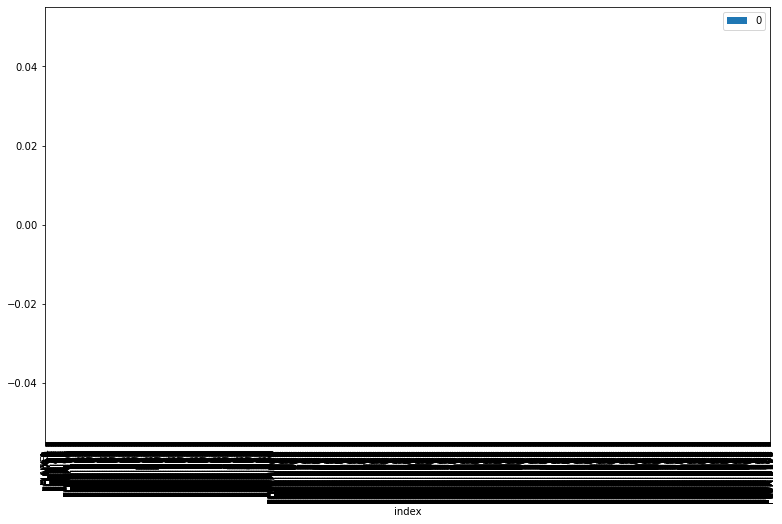

In [19]:
fig = train.isnull().sum().reset_index().plot(kind='bar', x='index', y=0)

fig

we can see from the above plot that there are no NULL values

# Visualizing Target variable

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

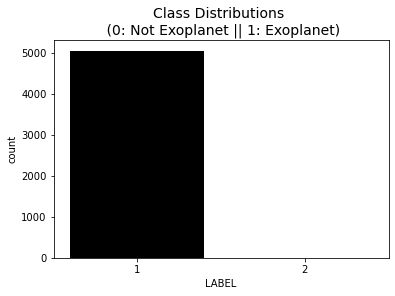

In [21]:
plt.figure(figsize=(6,4))
colors = ["0", "1"]
sns.countplot('LABEL', data=train, palette=colors)
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)

<AxesSubplot:xlabel='index'>

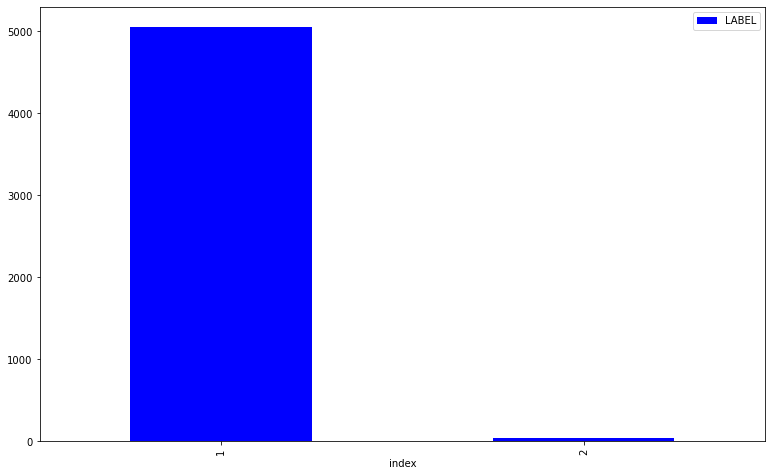

In [16]:
train['LABEL'].value_counts().reset_index().plot(kind='bar', x='index', y='LABEL', color='blue')

we can see from the above 2 plots that our dataset is highly imbalanced hence data preprocessing is highly required

# Plotting the first 4 stars flux details of the train data and observing the intensity of flux values:

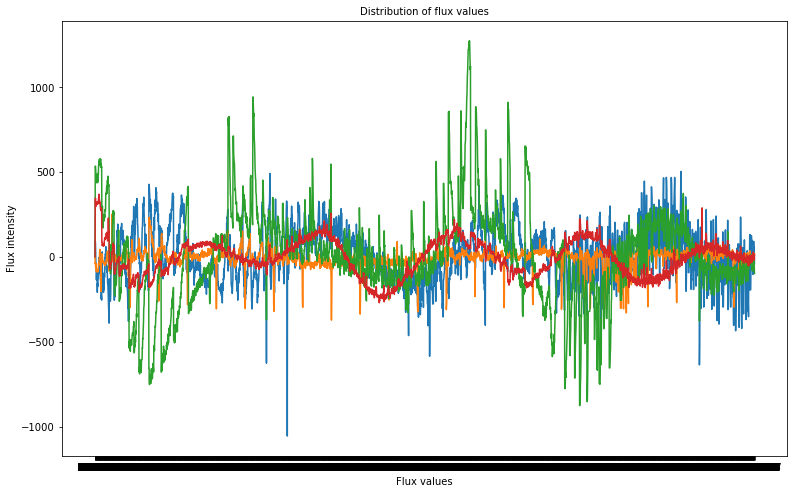

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8
plt.title('Distribution of flux values', fontsize=10)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train.iloc[0,])
plt.plot(train.iloc[1,])
plt.plot(train.iloc[2,])
plt.plot(train.iloc[3,])
plt.show()

data is clean but is not normalized.

# Data Visualization

Pairplot for first 5 intensities


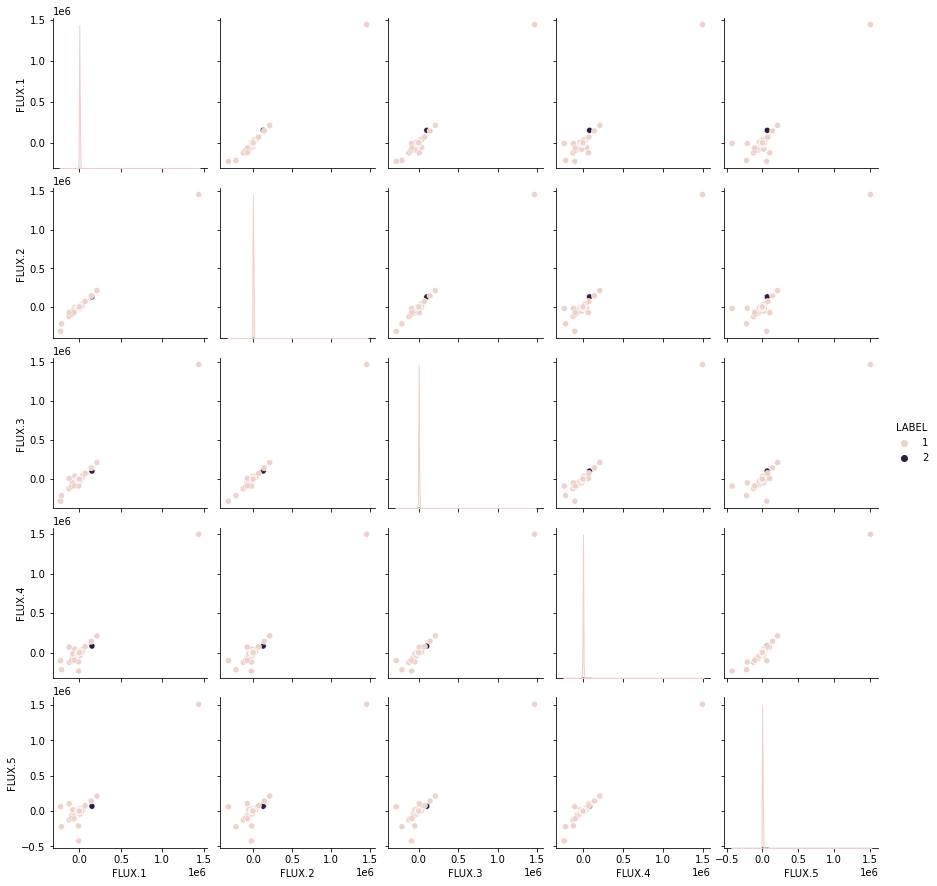

In [23]:
print('Pairplot for first 5 intensities')
sns.pairplot(data=train[['LABEL','FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']], hue='LABEL')
plt.show()

In [5]:
import plotly.express as px
fig = px.scatter_matrix(train[['FLUX.1','FLUX.2','FLUX.3','FLUX.4','FLUX.5']])
fig.update_layout(title="Scatter Matrix for first 5 light intensities")
fig.show()

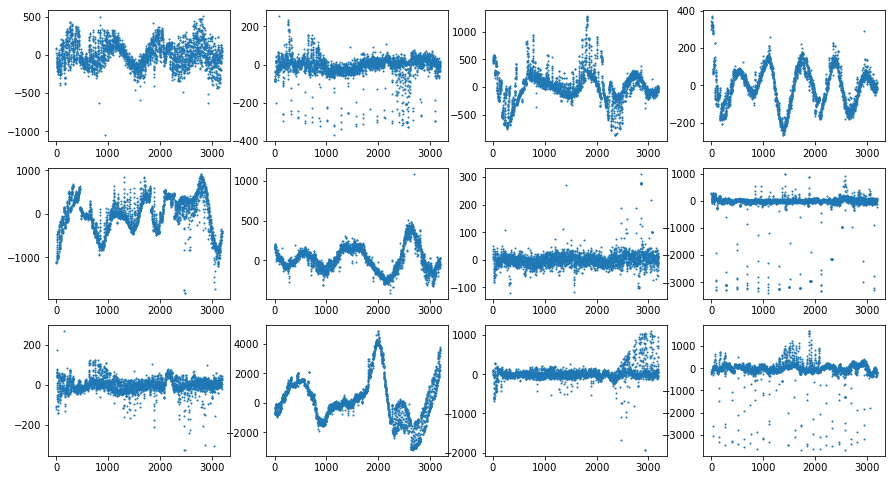

In [13]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 2].iloc[i,1:],s=1)

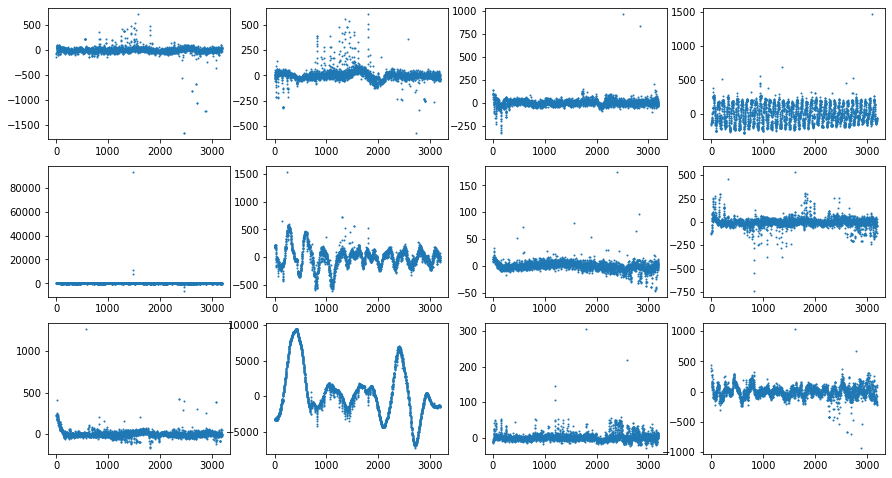

In [7]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL']==1].iloc[i,1:],s=1)

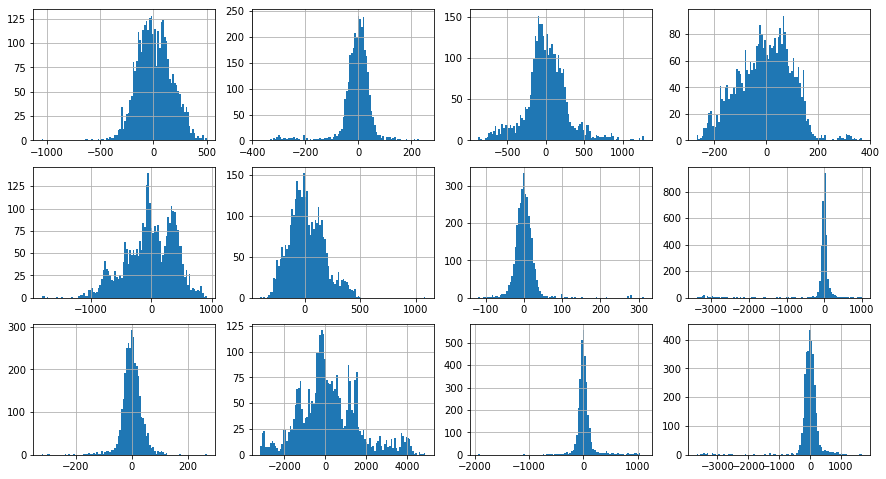

In [24]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train[train['LABEL']==2].iloc[i,1:].hist(bins=100)

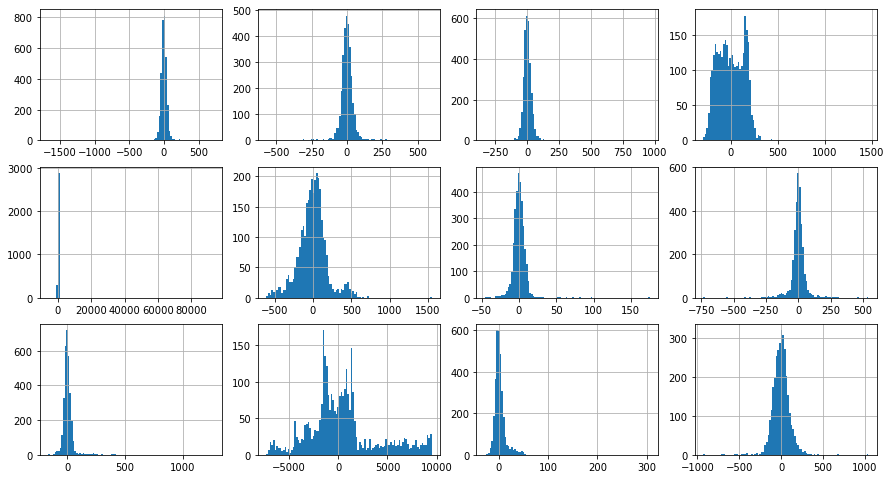

In [25]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train[train['LABEL']==1].iloc[i,1:].hist(bins=100)

In [25]:
maxval = train.iloc[:,1:].max(axis=1)
minval = train.iloc[:,1:].min(axis=1)

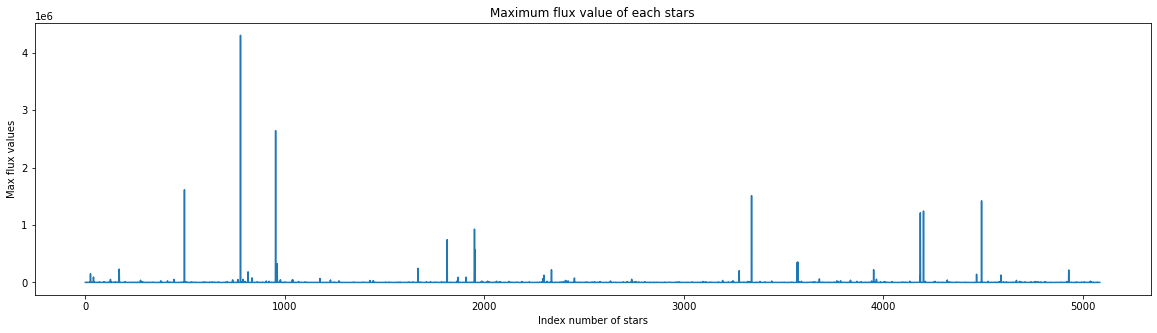

In [26]:
plt.figure(figsize=(20,5))
plt.title('Maximum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Max flux values')
plt.plot(np.arange(len(maxval)),maxval)

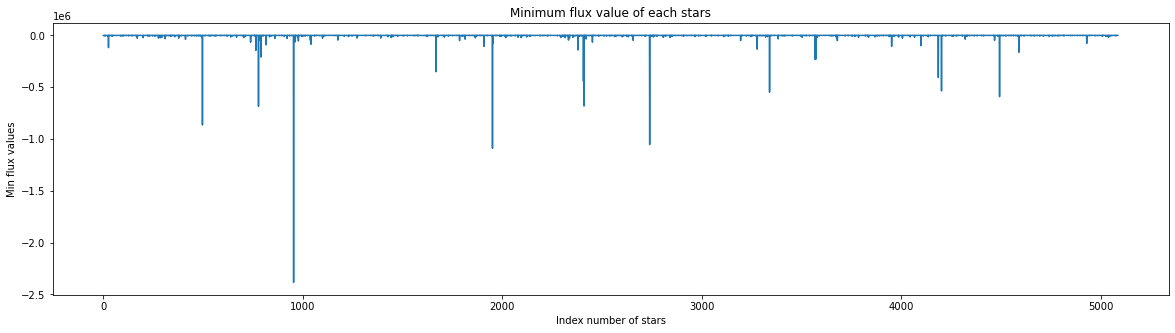

In [27]:
plt.figure(figsize=(20,5))
plt.title('Minimum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Min flux values')
plt.plot(np.arange(len(minval)),minval)


In [28]:
def reset(train,test):
    train_X = train.drop('LABEL', axis=1)
    train_y = train['LABEL'].values
    test_X = test.drop('LABEL', axis=1)
    test_y = test['LABEL'].values
    return train_X,train_y,test_X,test_y

train_X,train_y,test_X,test_y = reset(train,test)

In [5]:
def norm(df1,df2):
    train_X = normalize(df1)
    test_X = normalize(df2)
    return train_X,test_X

In [4]:
def std_scaler(df1,df2):
    std_scaler = StandardScaler()
    train_X = std_scaler.fit_transform(df1)
    test_X = std_scaler.fit_transform(df2)
    return train_X,test_X


In [29]:
def robust(df1,df2):
    scaler = RobustScaler()
    train_X = scaler.fit_transform(df1)
    test_X = scaler.transform(df2)
    return train_X,test_X

In [7]:
def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

In [6]:
def fourier(df1,df2):
    train_X = np.abs(np.fft.fft(df1, axis=1))
    test_X = np.abs(np.fft.fft(df2, axis=1))
    return train_X,test_X

In [8]:
def smote(a,b):
    model = SMOTE()
    X,y = model.fit_sample(a, b)
    return X,y

In [9]:
def logistic(train_X,train_y,test_X,test_y):
    lgr = LogisticRegression(max_iter=1000)
    lgr.fit(train_X,train_y)
    prediction_lgr=lgr.predict(test_X)
    print("-------------------------------------------")
    print("Logistic Regression")
    print("")
    print(classification_report(test_y,prediction_lgr))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(lgr,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(lgr,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(lgr, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, prediction_lgr,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#logistic(train_X,train_y,test_X,test_y)

In [10]:
def decisionTree(train_X,train_y,test_X,test_y):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train_X, train_y)
    y_pred_clf = clf.predict(test_X)
    print("-------------------------------------------")
    print("DecisionTree Classifier")
    print("")
    print(classification_report(test_y,y_pred_clf))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(clf,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(clf,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(clf, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, y_pred_clf,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1

In [11]:
def linearSVC(train_X,train_y,test_X,test_y):
    svm=LinearSVC()
    svm.fit(train_X,train_y)
    prediction_svm=svm.predict(test_X)
    print("-------------------------------------------")
    print("Linear SVClassifier")
    print("")
    print(classification_report(test_y,prediction_svm))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(svm,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(svm,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(svm, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, prediction_svm,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1

In [12]:
def naiveBayes(train_X,train_y,test_X,test_y):
    gnb = GaussianNB()
    gnb.fit(train_X, train_y)
    y_pred=gnb.predict(test_X)
    print("-------------------------------------------")
    print("Gaussian NaiveBayes Classifier")
    print("")
    print(classification_report(test_y,y_pred))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(gnb,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(gnb,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(gnb, test_X, test_y,ax=ax)
    f1 = metrics.f1_score(test_y, y_pred,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#naiveBayes(train_X,train_y,test_X,test_y)

In [13]:
def knn(train_X,train_y,test_X,test_y):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(train_X, train_y)
    y_pred_neigh = neigh.predict(test_X)
    print("-------------------------------------------")
    print("k-Nearest Neighbour Classifier")
    print("")
    print(classification_report(test_y,y_pred_neigh))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(neigh,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(neigh,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(neigh, test_X, test_y,ax=ax)
    plt.show()
    f1 = metrics.f1_score(test_y, y_pred_neigh,pos_label=2)
    print("F1 score of minority class:",f1)
    return f1
#knn(train_X,train_y,test_X,test_y) 

In [14]:
def randomForest(train_X,train_y,test_X,test_y):
    rnd = RandomForestClassifier()
    rnd.fit(train_X, train_y)
    y_pred_rnd = rnd.predict(test_X)
    print("-------------------------------------------")
    print("Random Forest Classifier")
    print("")
    print(classification_report(test_y,y_pred_rnd))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(rnd,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(rnd,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(rnd, test_X, test_y,ax=ax)
    plt.show()
    f1 = metrics.f1_score(test_y, y_pred_rnd,pos_label=2)
    print("F1 score of minority class:",f1)
    return f1
#randomForest(train_X,train_y,test_X,test_y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

F1 score of minority class: 0.037209302325581395


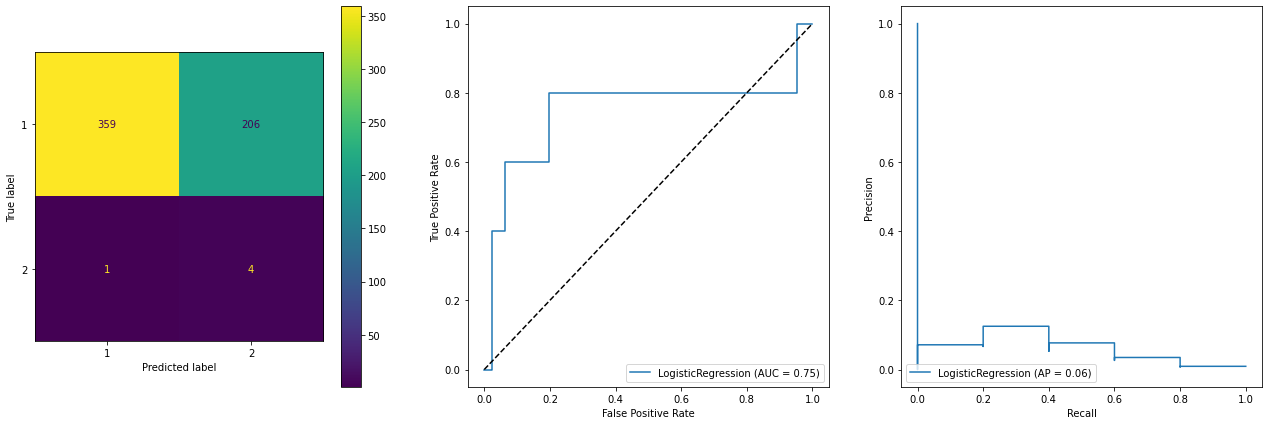

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       565
           2       0.25      0.40      0.31         5

    accuracy                           0.98       570
   macro avg       0.62      0.69      0.65       570
weighted avg       0.99      0.98      0.99       570

F1 score of minority class: 0.3076923076923077


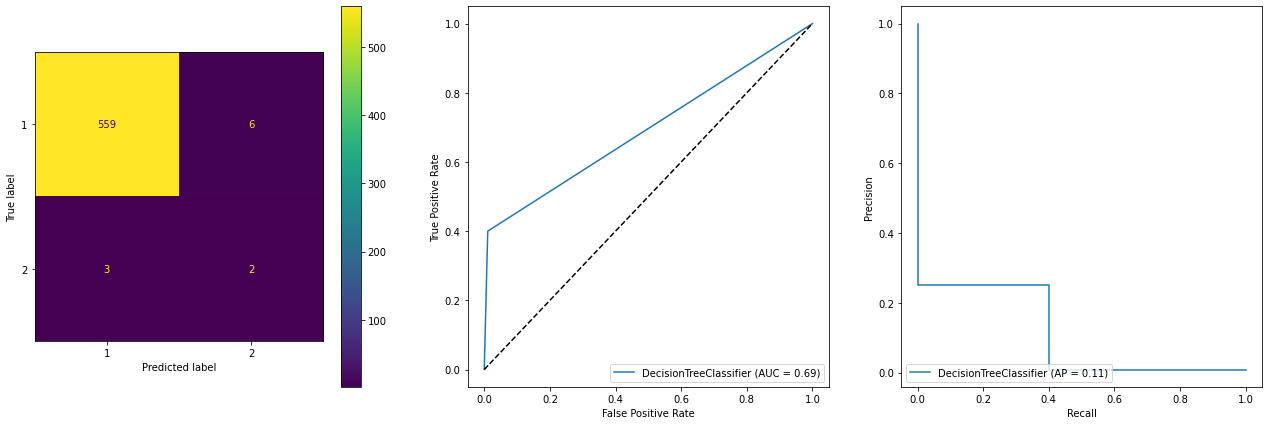

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

F1 score of minority class: 0.027906976744186046


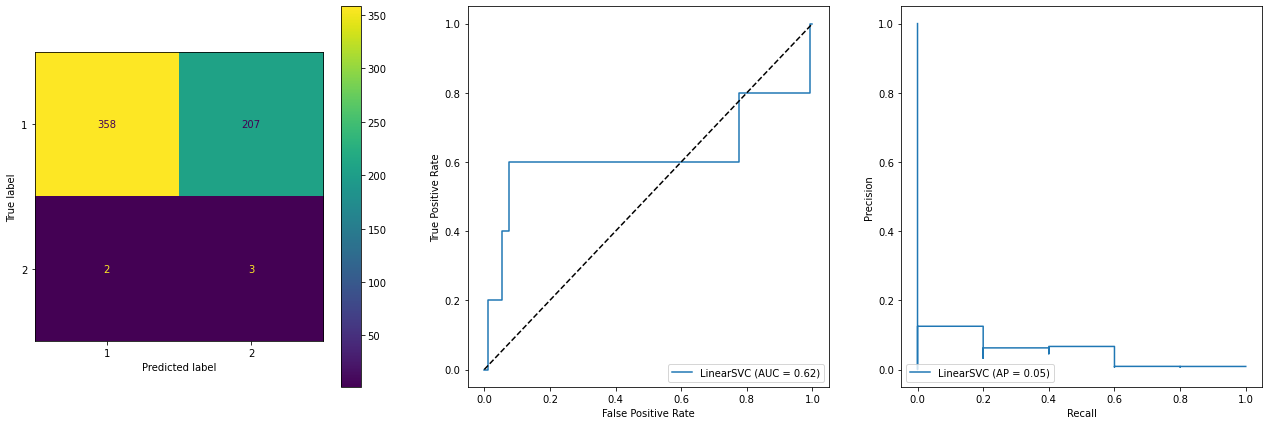

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       1.00      0.02      0.03       565
           2       0.01      1.00      0.02         5

    accuracy                           0.02       570
   macro avg       0.50      0.51      0.02       570
weighted avg       0.99      0.02      0.03       570

F1 score of minority class: 0.017667844522968195


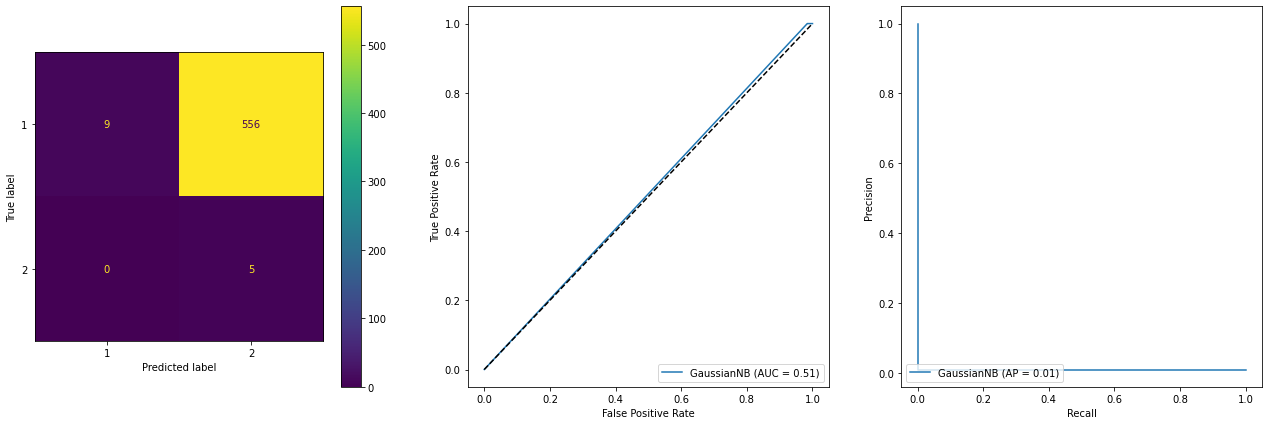

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


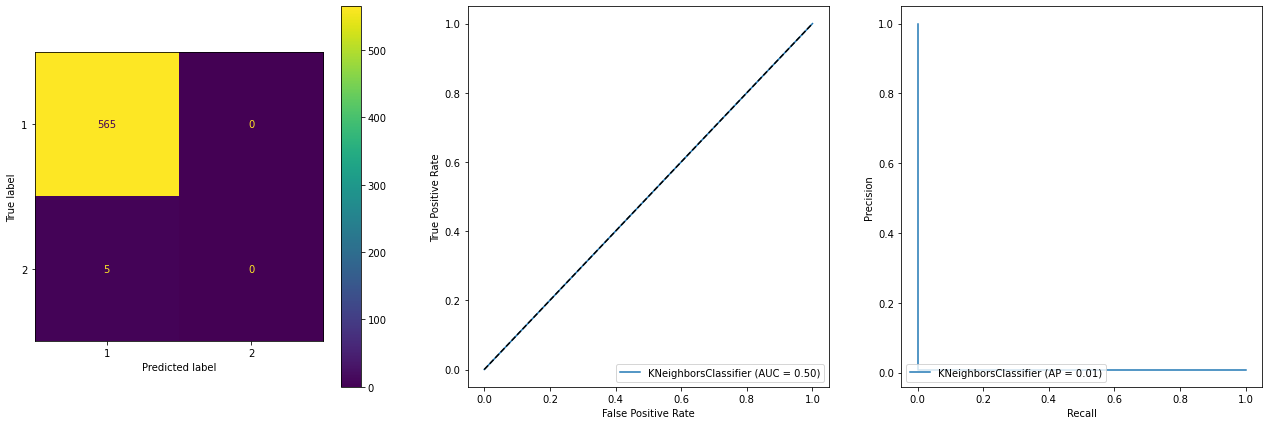

F1 score of minority class: 0.0
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


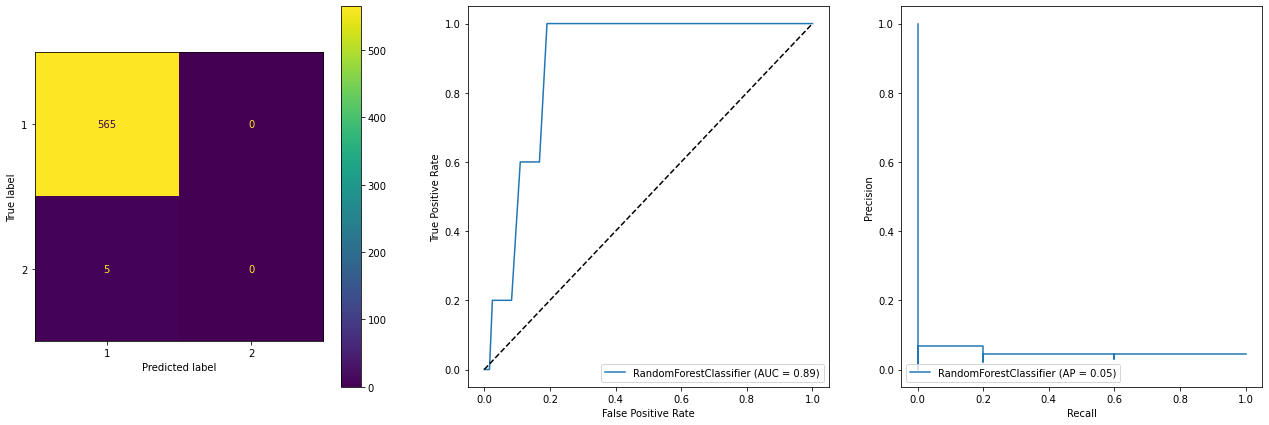

F1 score of minority class: 0.0


[0.037209302325581395,
 0.3076923076923077,
 0.027906976744186046,
 0.017667844522968195,
 0.0,
 0.0]

In [39]:
train_X,train_y,test_X,test_y = reset(train,test)
f1_original =  []
f1_original.append(logistic(train_X,train_y,test_X,test_y))
f1_original.append(decisionTree(train_X,train_y,test_X,test_y))
f1_original.append(linearSVC(train_X,train_y,test_X,test_y))
f1_original.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_original.append(knn(train_X,train_y,test_X,test_y))
f1_original.append(randomForest(train_X,train_y,test_X,test_y))
f1_original

From the above results, decision tree classifier gave a better F1 score although it missed a few stars with exoplanets. The poor perfromance of the other models is because of non-processed data.

# Data Preprocessing
different combinations of filtering, scaling and normalizing.

We are converting the original time domain signal to frequency domain.Then we are smoothing it and the outliers at beginning and the end of the can be dealt while applying robust scaler.

Steps involved in Preprocessing:

For reducing noise and filtering, we can apply fast fourier transform
For signal smoothing, Savitzky-Golay filter can be applied.
Then the signal can be normalized and then a robust scaler can be applied
The Robust scaler is ideal here because of the presence of the outliers.

In [30]:
train_X,train_y,test_X,test_y = reset(train,test)
a,b = fourier(train_X,test_X)
c,d = savgol(a,b)
e,f = norm(c,d)
g,h = robust(e,f)

In [31]:
 #index 0-37 contains stars with exoplanets and the rest are stars with no exoplanets
planets = [0,1,2,3,4,5,6,44,56,67,78,91,92,97]

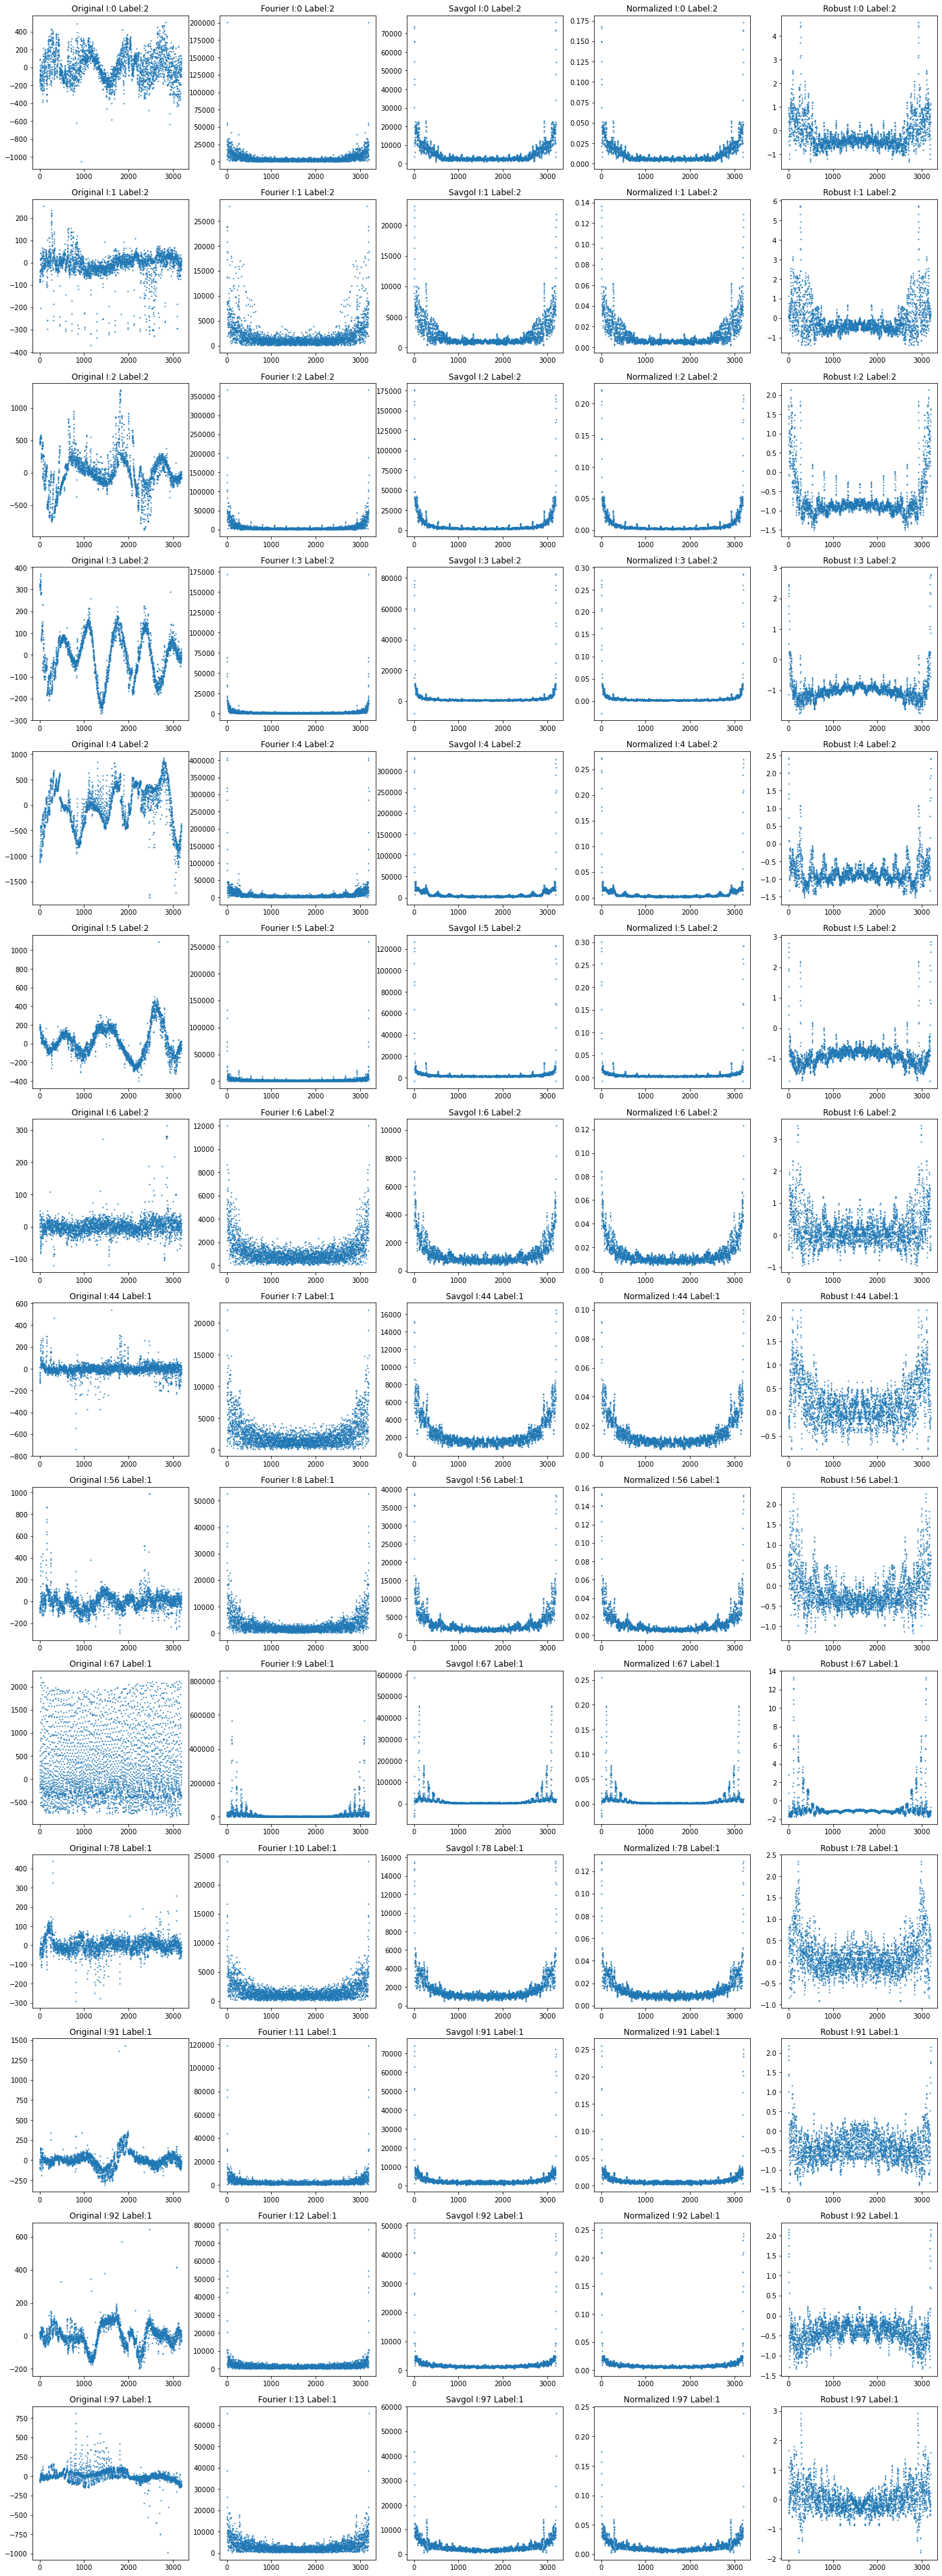

In [32]:
fig = plt.figure(figsize=(24,500))
x = np.array(range(3197))
for i in range(0,len(planets)):
    ax = fig.add_subplot(100,5,5*i+1)
    ax.set_title('Original '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,train_X.iloc[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+2)
    ax.set_title('Fourier '+"I:"+str(i)+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,a[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+3)
    ax.set_title('Savgol '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,c[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+4)
    ax.set_title('Normalized '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,e[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+5)
    ax.set_title('Robust '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,g[planets[i],:],s=1)

# Model Comparison with Preprocessed Data

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.60      0.60      0.60         5

    accuracy                           0.99       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.99      0.99      0.99       570

F1 score of minority class: 0.6


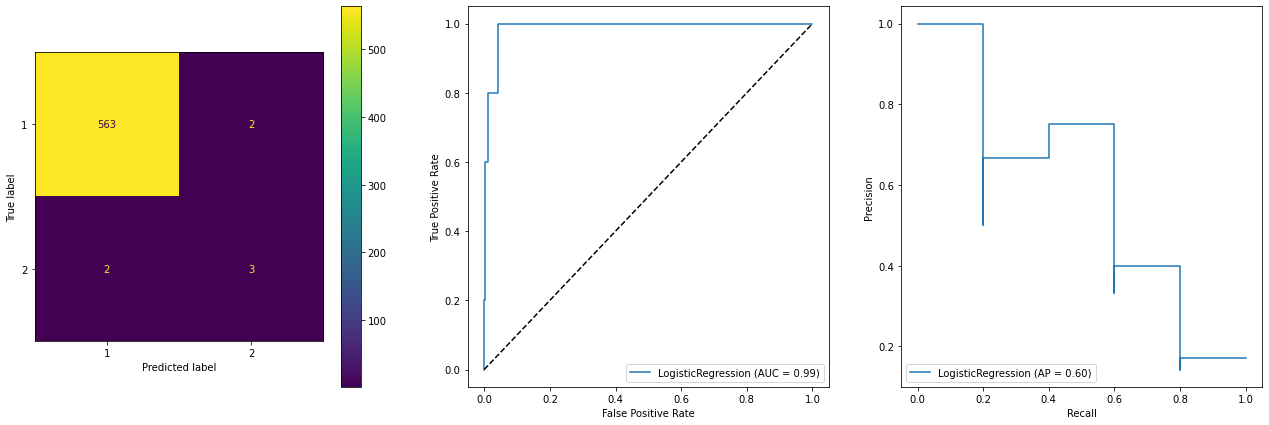

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      0.80      0.89         5

    accuracy                           1.00       570
   macro avg       1.00      0.90      0.94       570
weighted avg       1.00      1.00      1.00       570

F1 score of minority class: 0.888888888888889


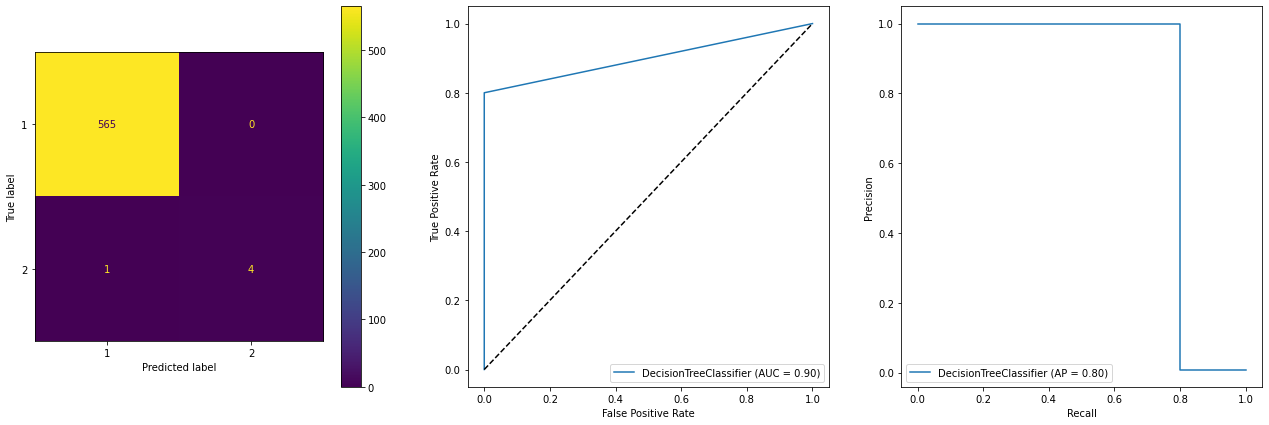

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       565
           2       0.50      0.60      0.55         5

    accuracy                           0.99       570
   macro avg       0.75      0.80      0.77       570
weighted avg       0.99      0.99      0.99       570

F1 score of minority class: 0.5454545454545454


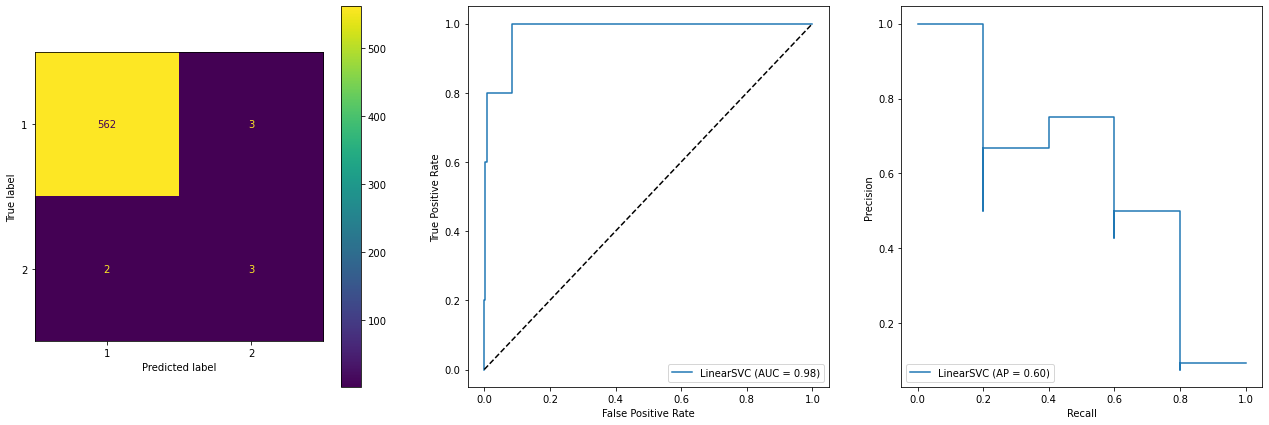

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       1.00      0.77      0.87       565
           2       0.04      1.00      0.07         5

    accuracy                           0.77       570
   macro avg       0.52      0.88      0.47       570
weighted avg       0.99      0.77      0.86       570

F1 score of minority class: 0.0704225352112676


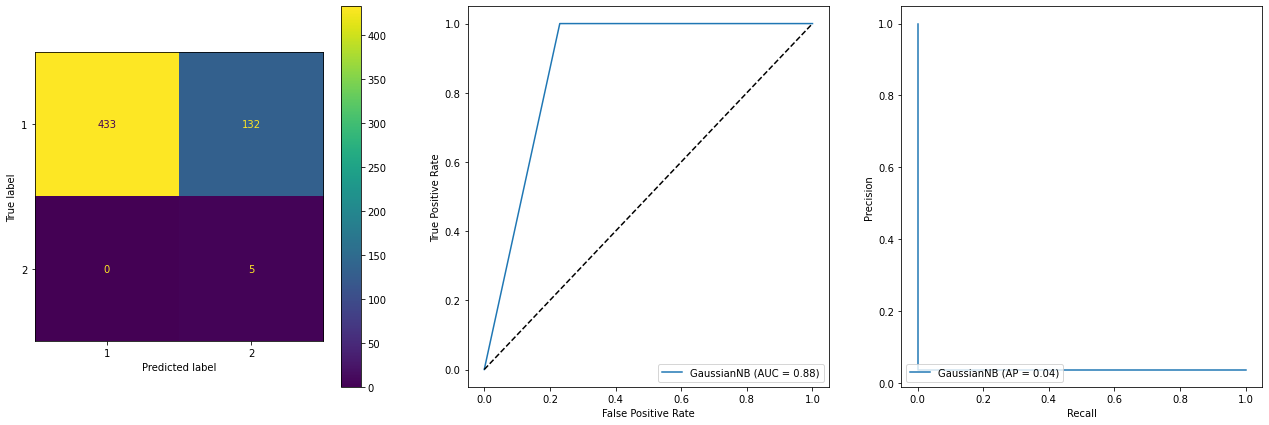

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.40      0.57         5

    accuracy                           0.99       570
   macro avg       1.00      0.70      0.78       570
weighted avg       0.99      0.99      0.99       570



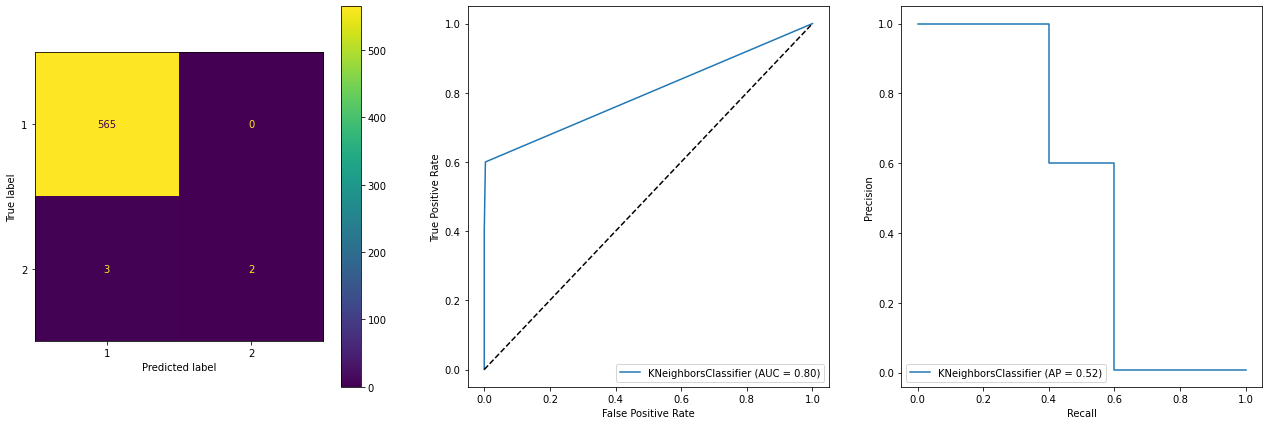

F1 score of minority class: 0.5714285714285715
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570



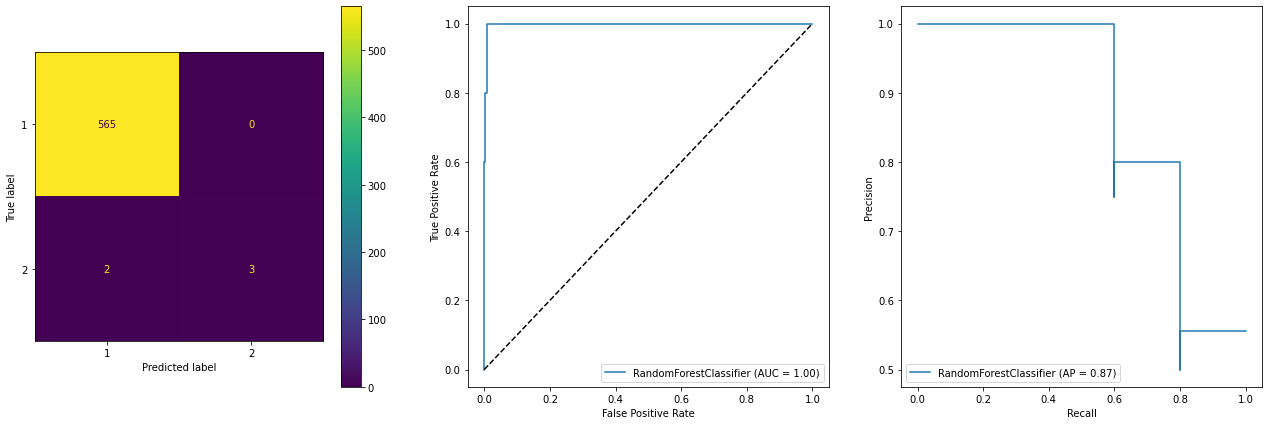

F1 score of minority class: 0.7499999999999999


[0.6,
 0.888888888888889,
 0.5454545454545454,
 0.0704225352112676,
 0.5714285714285715,
 0.7499999999999999]

In [33]:
train_X,train_y,test_X,test_y = reset(train,test)
train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

f1_processed =  []
f1_processed.append(logistic(train_X,train_y,test_X,test_y))
f1_processed.append(decisionTree(train_X,train_y,test_X,test_y))
f1_processed.append(linearSVC(train_X,train_y,test_X,test_y))
f1_processed.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_processed.append(knn(train_X,train_y,test_X,test_y))
f1_processed.append(randomForest(train_X,train_y,test_X,test_y))
f1_processed

# Model Comparison with SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2071
           2       0.99      1.00      1.00      1529

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600

F1 score of minority class: 0.9967362924281984


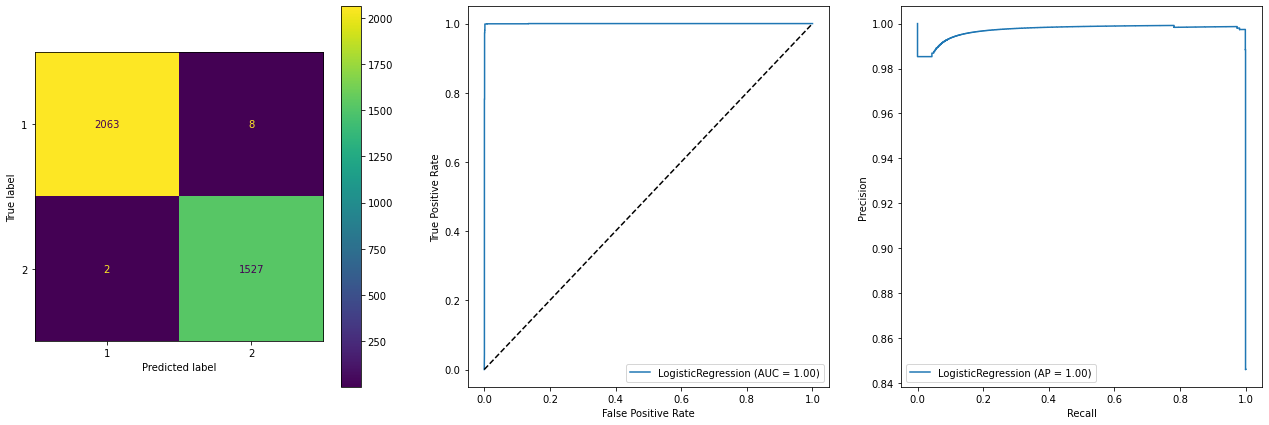

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      2071
           2       0.99      1.00      0.99      1529

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600

F1 score of minority class: 0.9928292046936115


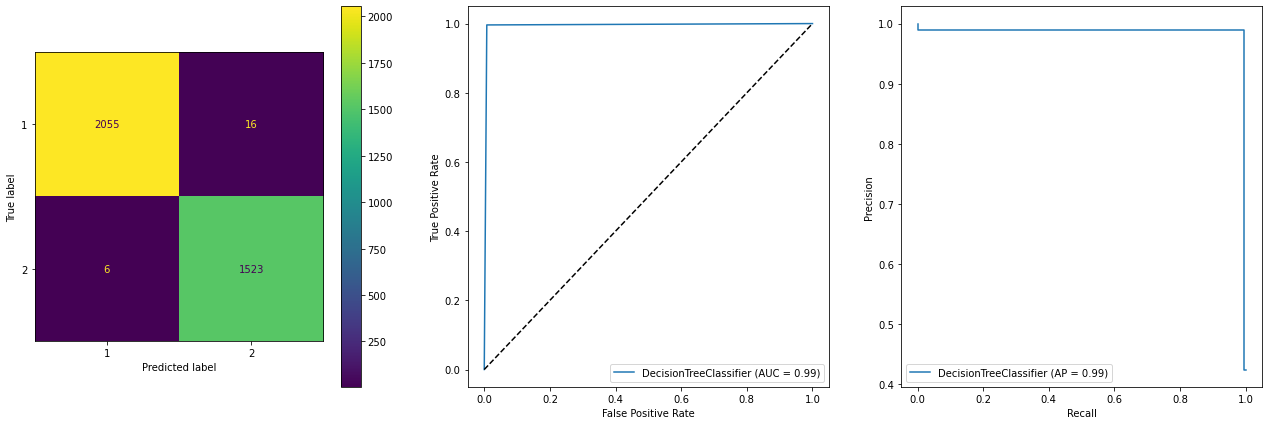

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       1.00      0.98      0.99      2071
           2       0.97      1.00      0.98      1529

    accuracy                           0.99      3600
   macro avg       0.98      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600

F1 score of minority class: 0.984219001610306


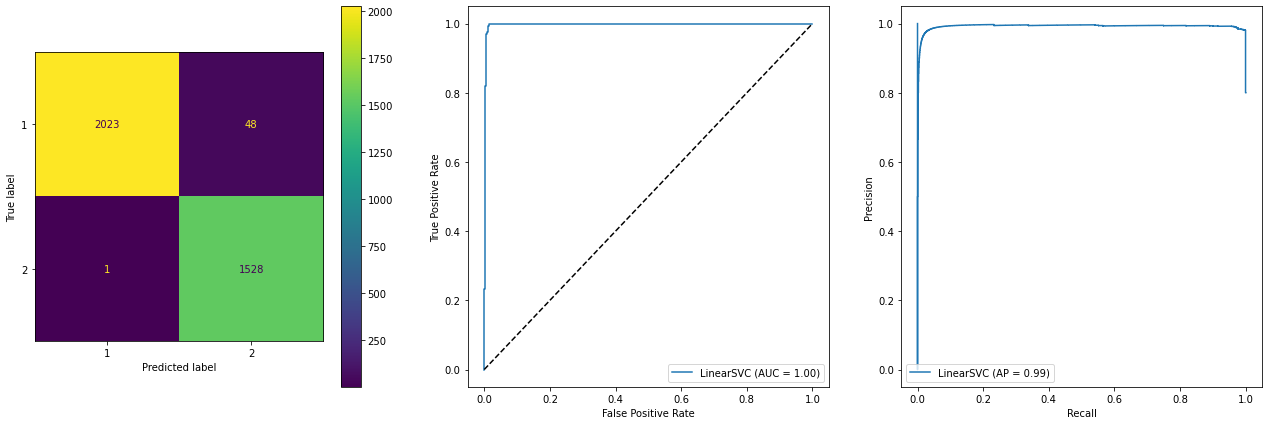

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       0.85      0.69      0.76      2071
           2       0.66      0.83      0.74      1529

    accuracy                           0.75      3600
   macro avg       0.75      0.76      0.75      3600
weighted avg       0.77      0.75      0.75      3600

F1 score of minority class: 0.7370564281559046


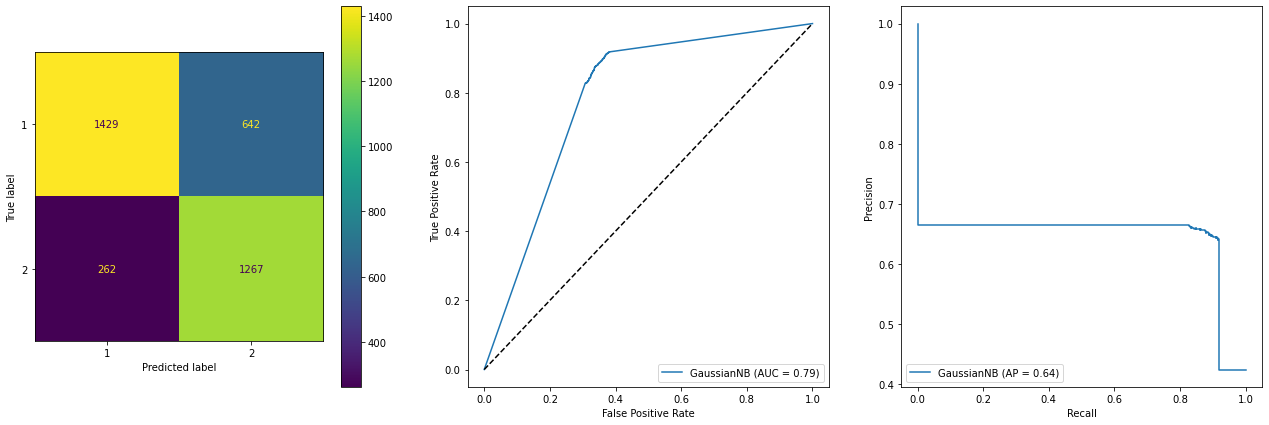

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       1.00      0.90      0.94      2071
           2       0.88      1.00      0.93      1529

    accuracy                           0.94      3600
   macro avg       0.94      0.95      0.94      3600
weighted avg       0.95      0.94      0.94      3600



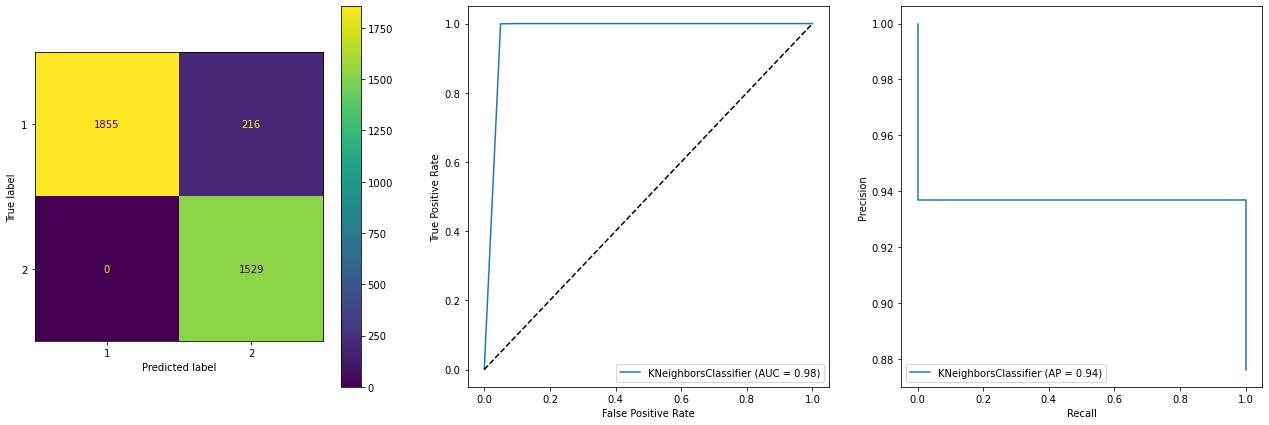

F1 score of minority class: 0.9340256566890653
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2071
           2       1.00      1.00      1.00      1529

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



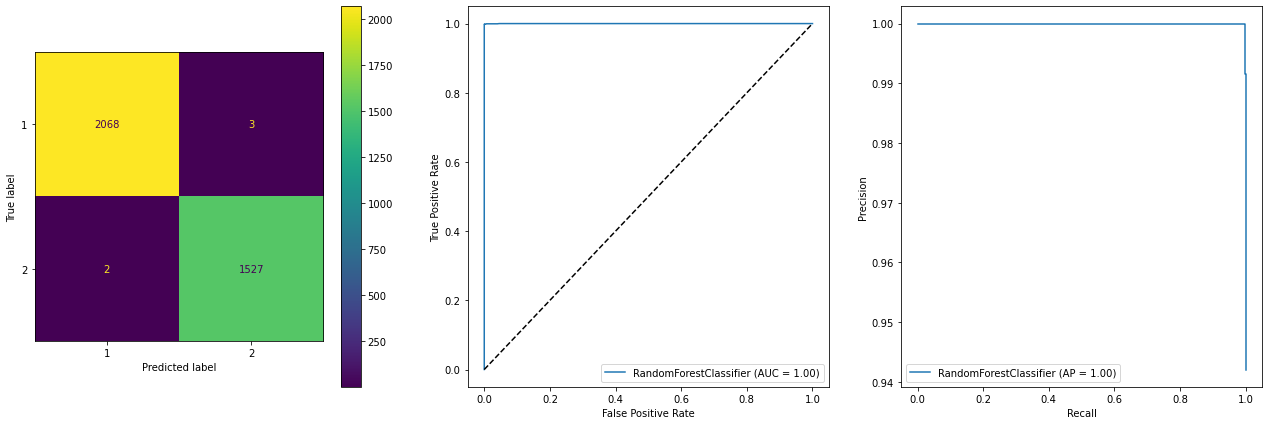

F1 score of minority class: 0.9983654789146781


[0.9967362924281984,
 0.9928292046936115,
 0.984219001610306,
 0.7370564281559046,
 0.9340256566890653,
 0.9983654789146781]

In [37]:
train_X,train_y,test_X,test_y = reset(train,test)

train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

train_X,train_y = smote(train_X,train_y)
train_X, X, train_y, y = train_test_split(train_X, train_y, test_size=0.3)
test_X = np.concatenate((test_X, X), axis=0)
test_y = np.concatenate((test_y, y), axis=0)

f1_smote =  []
f1_smote.append(logistic(train_X,train_y,test_X,test_y))
f1_smote.append(decisionTree(train_X,train_y,test_X,test_y))
f1_smote.append(linearSVC(train_X,train_y,test_X,test_y))
f1_smote.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_smote.append(knn(train_X,train_y,test_X,test_y))
f1_smote.append(randomForest(train_X,train_y,test_X,test_y))
f1_smote

In [41]:
cols = ['Logistic','DecisionTree','LinearSVC','NaiveBayes','kNN','RandomForest']
import pandas as pd
df = pd.DataFrame(list(zip(f1_original,f1_processed,f1_smote)),columns = 
                  ['Original Data','Processed','Processed with SMOTE'],index=cols) 
df

Original Data  Processed  Processed with SMOTE
Logistic           0.037209   0.600000              0.996736
DecisionTree       0.307692   0.888889              0.992829
LinearSVC          0.027907   0.545455              0.984219
NaiveBayes         0.017668   0.070423              0.737056
kNN                0.000000   0.571429              0.934026
RandomForest       0.000000   0.750000              0.998365

# CNN

In [3]:
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [4]:
X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0:1].values
X_test = test.iloc[:,1:].values
y_test = test.iloc[:,0:1].values

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
#Convert data into 3d tensor
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [7]:
#Initialising the CNN
classifier = Sequential()

#1.Convolution
classifier.add(Convolution1D(filters=8, kernel_size=11, activation="relu", input_shape=(3197,1)))
#2.Max Pooling
classifier.add(MaxPooling1D(strides=4))
classifier.add(BatchNormalization())
#3.Flattening
classifier.add(Flatten())
#4.Full Connection
classifier.add(Dropout(0.5))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [8]:
#Configure the learning process
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
classifier.fit(X_train, y_train, batch_size=32, epochs=1, validation_data=(X_test,y_test))

159/159 [==============================] - 7s 42ms/step - loss: -2.3490 - accuracy: 0.9862 - val_loss: -1.2475 - val_accuracy: 0.9912


In [10]:
score = classifier.evaluate(X_test, y_test)

18/18 [==============================] - 0s 10ms/step - loss: -1.2475 - accuracy: 0.9912


From the above tables we can see that all the classifier weakly performed on the raw dataset. Processing the dataset i.e. applying scaling and filtering did increase the performance of classifiers drastically especially for KNN and RandomForest. But the performance as such was not very good , as we can in the table .
Applying SMOTE has greatly improvised the performance of all classifiers. It was not just better from training on the raw data but it bore great results. As we can see all classifiers gave an accuracy above 92%  except naïve bayes that couldn’t perform that well.


Random Forest classifier with smote data is giving the best results.Smote bore great results because the dataset is higly disbalanced